In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [23]:
print('hey')

hey


In [5]:
file_paths = ["data/prices_round_2_day_-1.csv",
              "data/prices_round_2_day_0.csv",
              "data/prices_round_2_day_1.csv"]
dataframes = []
for file_path in file_paths:
    df = pd.read_csv(file_path, sep=';')
    dataframes.append(df)

# Naming dataframes
day_0_df = dataframes[0]
day_1_df = dataframes[1]
day_2_df = dataframes[2]

data = day_0_df

In [6]:
orchids_export_correlation = df['ORCHIDS'].corr(df['EXPORT_TARIFF'])
orchids_import_correlation = df['ORCHIDS'].corr(df['IMPORT_TARIFF'])

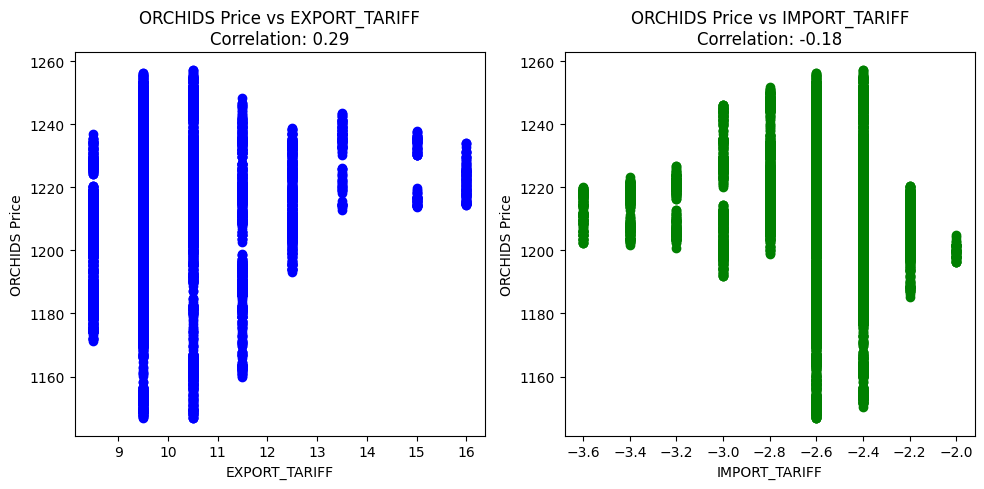

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['EXPORT_TARIFF'], data['ORCHIDS'], color='blue')
plt.xlabel('EXPORT_TARIFF')
plt.ylabel('ORCHIDS Price')
plt.title(f'ORCHIDS Price vs EXPORT_TARIFF\nCorrelation: {orchids_export_correlation:.2f}')

# Create scatter plot for ORCHIDS vs IMPORT_TARIFF
plt.subplot(1, 2, 2)
plt.scatter(data['IMPORT_TARIFF'], data['ORCHIDS'], color='green')
plt.xlabel('IMPORT_TARIFF')
plt.ylabel('ORCHIDS Price')
plt.title(f'ORCHIDS Price vs IMPORT_TARIFF\nCorrelation: {orchids_import_correlation:.2f}')

plt.tight_layout()
plt.show()

In [8]:
def plot_day(data):
    plt.figure(figsize=(10, 6))
    
    # Plotting ORCHIDS
    plt.plot(data['timestamp'], data['ORCHIDS'], label='ORCHIDS', color='blue')
    
    # Creating a twin y-axis for EXPORT_TARIFF
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax2.plot(data['timestamp'], data['EXPORT_TARIFF'], label='EXPORT_TARIFF', color='green')
    ax2.set_ylabel('EXPORT_TARIFF')
    
    # Creating a separate y-axis for IMPORT_TARIFF
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(data['timestamp'], data['IMPORT_TARIFF'], label='IMPORT_TARIFF', color='red')
    ax3.set_ylabel('IMPORT_TARIFF')
    
    # Hide duplicate legend entries
    handles, labels = ax1.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    # Setting common labels and title
    plt.xlabel('Timestamp')
    plt.title('ORCHIDS and Tariffs Over Timestamp')
    
    # Show plot
    plt.tight_layout()
    plt.show()

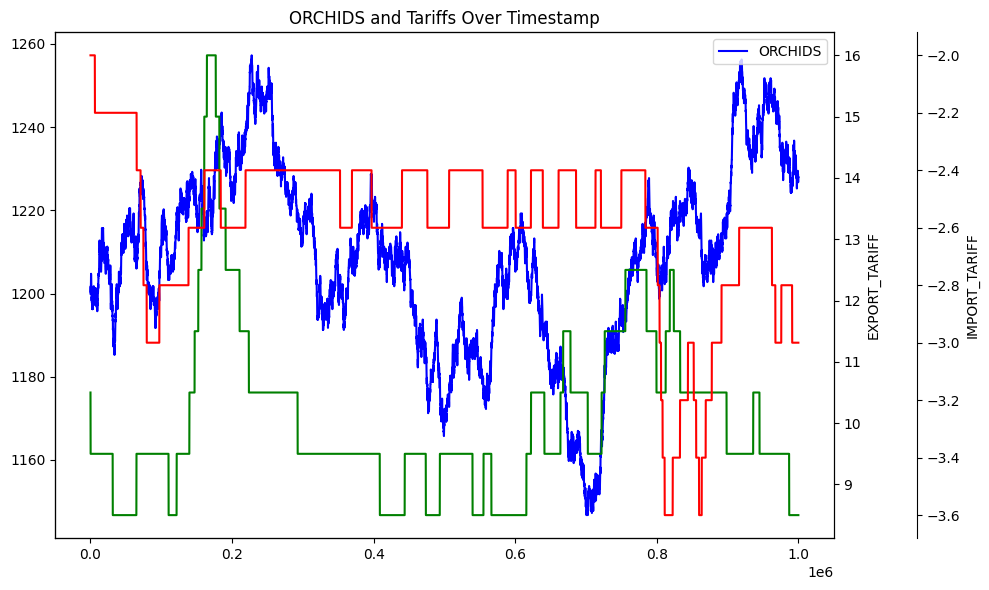

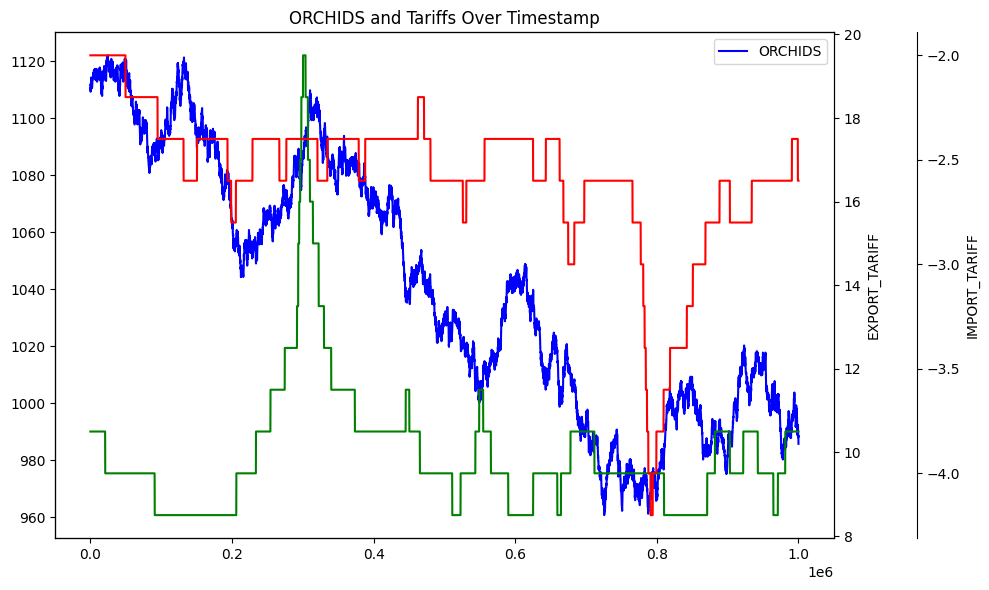

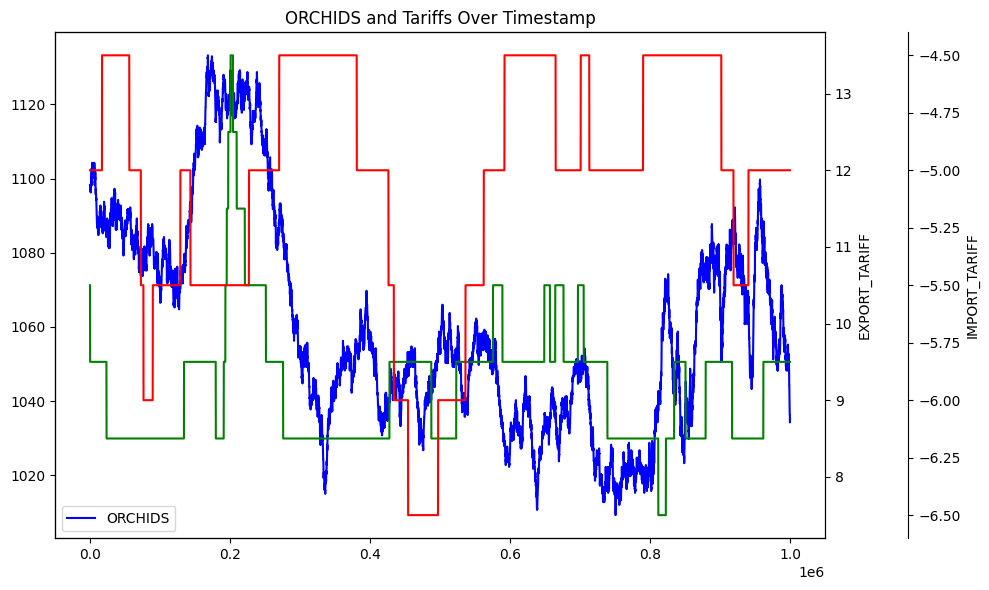

In [9]:
plot_day(day_0_df)
plot_day(day_1_df)
plot_day(day_2_df)

In [10]:
def plot_factors(data):
    plt.figure(figsize=(10, 6))
    # Plotting ORCHIDS
    plt.plot(data['timestamp'], data['ORCHIDS'], label='ORCHIDS', color='blue')
    plt.ylabel('ORCHIDS')
    
    # Creating a twin y-axis for HUMIDITY
    ax2 = plt.gca().twinx()
    ax2.plot(data['timestamp'], data['HUMIDITY'], label='HUMIDITY', color='green')
    ax2.set_ylabel('HUMIDITY')
    ax2.spines['right'].set_color('green')  # Set color of the spine for HUMIDITY y-axis
    
    # Creating a twin y-axis for SUNLIGHT
    ax3 = plt.gca().twinx()
    ax3.plot(data['timestamp'], data['SUNLIGHT'], label='SUNLIGHT', color='red')
    ax3.set_ylabel('SUNLIGHT')
    ax3.spines['right'].set_position(('outward', 60))  # Move SUNLIGHT y-axis to the right
    ax3.spines['right'].set_color('red')  # Set color of the spine for SUNLIGHT y-axis
    
    # Setting common labels and title
    plt.xlabel('Timestamp')
    plt.title('ORCHIDS, Humidity, and Sunlight Over Timestamp')
    
    # Show plot
    plt.tight_layout()
    plt.show()

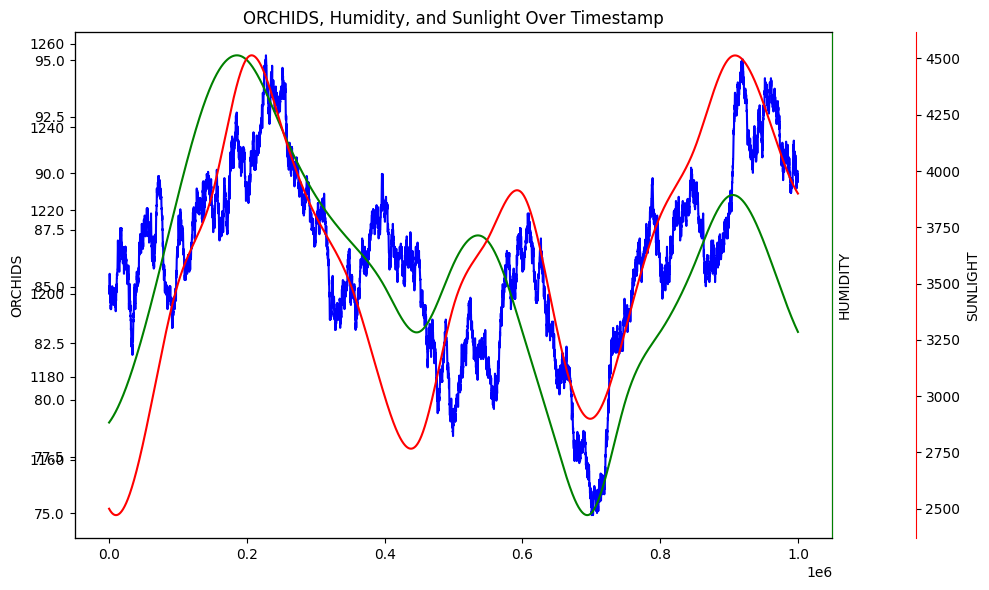

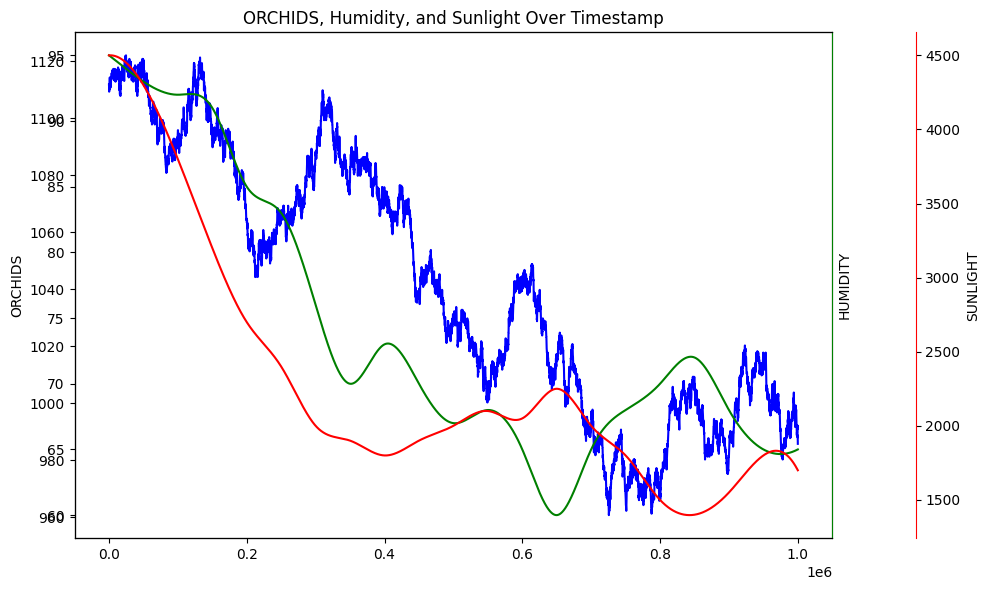

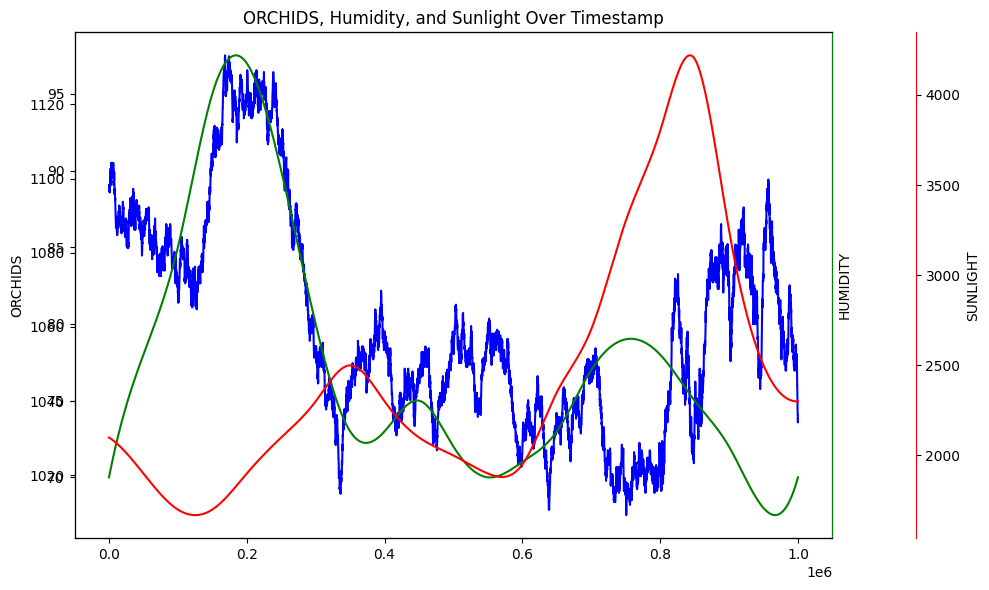

In [11]:
plot_factors(day_0_df)
plot_factors(day_1_df)
plot_factors(day_2_df)

In [43]:
def plot_sum(data):
    data['HUMIDITY_SUNLIGHT_SUM'] = data['HUMIDITY'] * 500 + data['SUNLIGHT']
    phase_shift = 10000
    # Apply phase shift to the timestamp for HUMIDITY_SUNLIGHT_SUM only
    data['timestamp_shifted'] = data['timestamp']
    data.loc[:, 'timestamp_shifted'] += phase_shift
    
    # Plotting the values over timestamp
    plt.figure(figsize=(10, 6))
    
    # Plotting ORCHIDS
    plt.plot(data['timestamp'], data['ORCHIDS'], label='ORCHIDS', color='blue')
    plt.ylabel('ORCHIDS')
    
    # Creating a twin y-axis for the sum of HUMIDITY and SUNLIGHT
    ax2 = plt.gca().twinx()
    ax2.plot(data['timestamp_shifted'], data['HUMIDITY_SUNLIGHT_SUM'], label='HUMIDITY + SUNLIGHT (shifted)', color='green')
    ax2.set_ylabel('HUMIDITY + SUNLIGHT')
    ax2.spines['right'].set_color('green')  # Set color of the spine for HUMIDITY + SUNLIGHT y-axis
    
    # Setting common labels and title
    plt.xlabel('Timestamp')
    plt.title('ORCHIDS and Sum of Humidity and Sunlight Over Timestamp (with Horizontal Shift for HUMIDITY_SUNLIGHT_SUM)')
    
    # Show plot
    plt.tight_layout()
    plt.show()

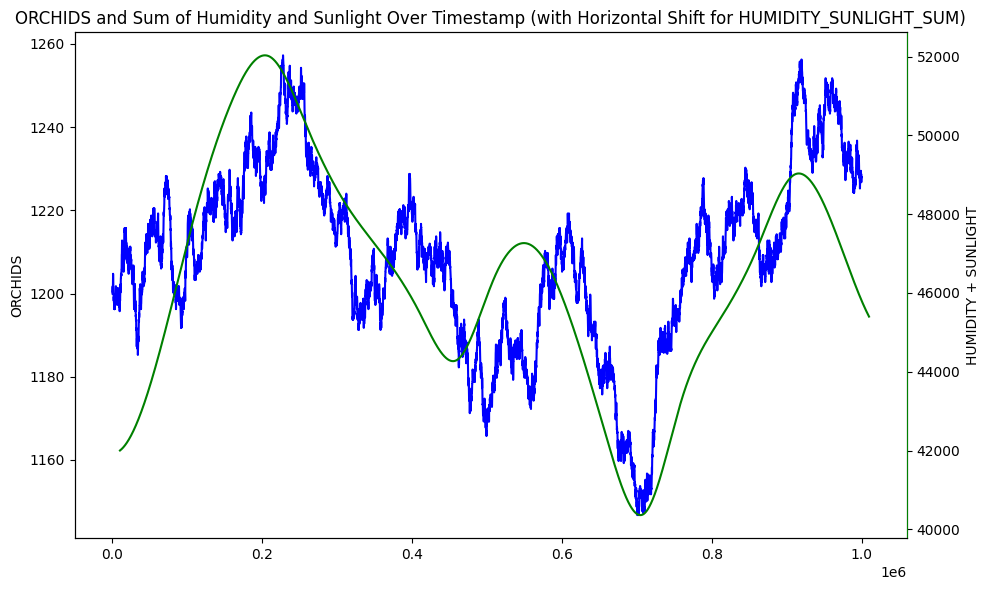

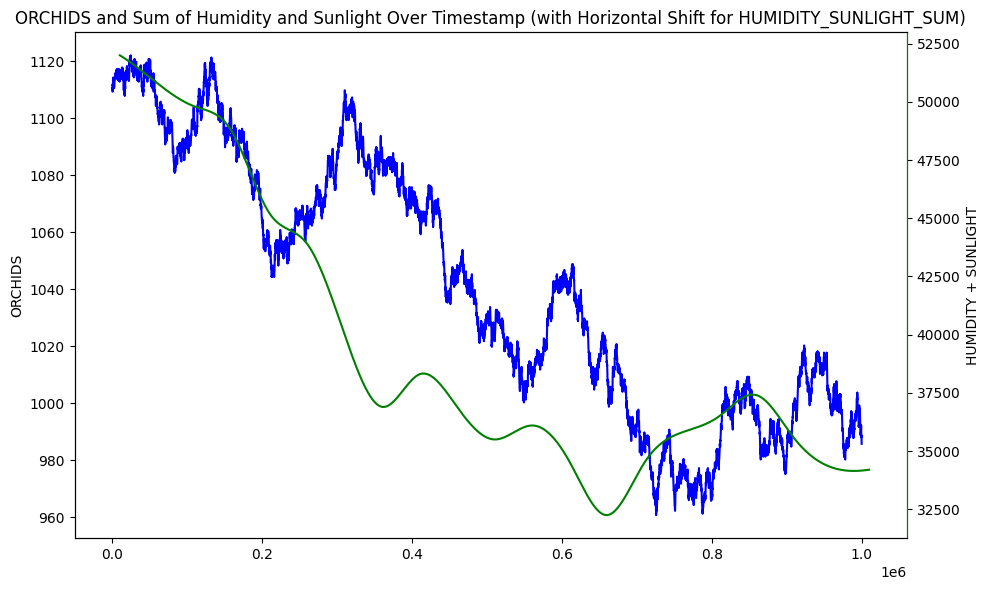

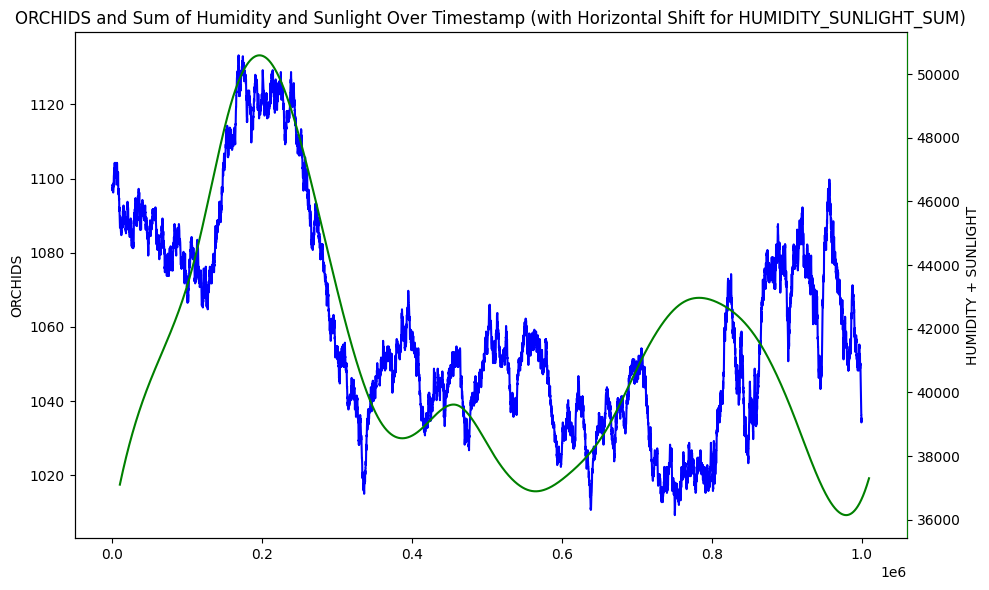

In [44]:
plot_sum(day_0_df)
plot_sum(day_1_df)
plot_sum(day_2_df)

Best Humidity Ratio: 10999
Best Correlation: 0.6208511335071851


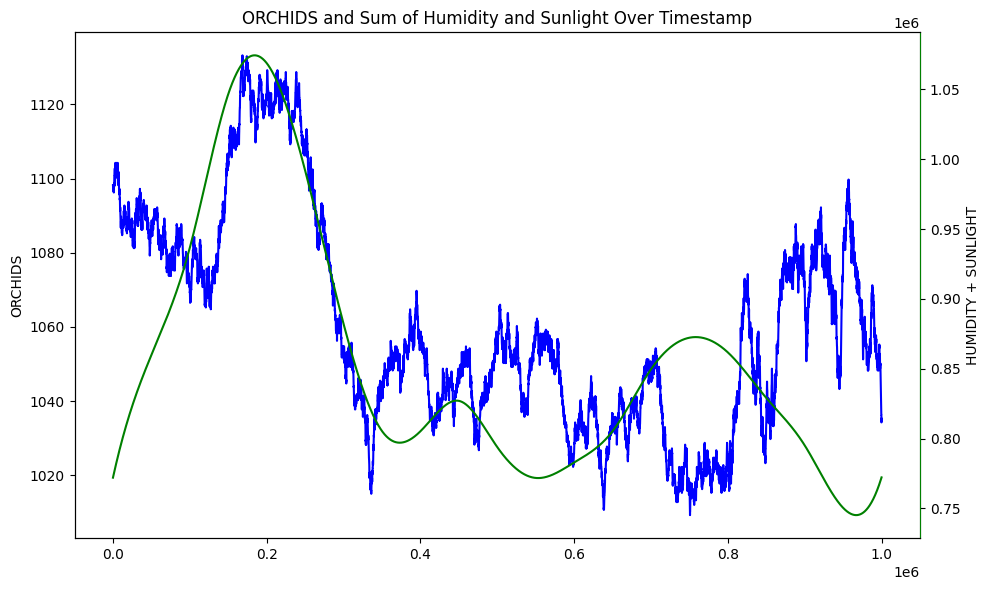

In [25]:
from scipy.stats import pearsonr

def plot_sum(data, humidity_ratio):
    # Calculate the sum of HUMIDITY and SUNLIGHT with specified ratios
    data['HUMIDITY_SUNLIGHT_SUM'] = data['HUMIDITY'] * humidity_ratio + data['SUNLIGHT']
    
    # Plotting the values over timestamp
    plt.figure(figsize=(10, 6))
    
    # Plotting ORCHIDS
    plt.plot(data['timestamp'], data['ORCHIDS'], label='ORCHIDS', color='blue')
    plt.ylabel('ORCHIDS')
    
    # Creating a twin y-axis for the sum of HUMIDITY and SUNLIGHT
    ax2 = plt.gca().twinx()
    ax2.plot(data['timestamp'], data['HUMIDITY_SUNLIGHT_SUM'], label='HUMIDITY + SUNLIGHT', color='green')
    ax2.set_ylabel('HUMIDITY + SUNLIGHT')
    ax2.spines['right'].set_color('green')  # Set color of the spine for HUMIDITY + SUNLIGHT y-axis
    
    # Setting common labels and title
    plt.xlabel('Timestamp')
    plt.title('ORCHIDS and Sum of Humidity and Sunlight Over Timestamp')
    
    # Show plot
    plt.tight_layout()
    plt.show()

def find_best_ratio(data):
    best_correlation = -1
    best_humidity_ratio = 0
    
    # Iterate over different ratios and calculate correlation
    for humidity_ratio in range(10000, 11000):  # Try ratios from 1 to 10
        data['HUMIDITY_SUNLIGHT_SUM'] = data['HUMIDITY'] * humidity_ratio + data['SUNLIGHT']
        # Calculate correlation coefficient between ORCHIDS and the sum of HUMIDITY and SUNLIGHT
        correlation, _ = pearsonr(data['ORCHIDS'], data['HUMIDITY_SUNLIGHT_SUM'])
        
        # Update best correlation and ratios if a better combination is found
        if correlation > best_correlation:
            best_correlation = correlation
            best_humidity_ratio = humidity_ratio
            
    return best_humidity_ratio, best_correlation

# Assuming you have already read your data into a DataFrame named 'data'
# Replace 'data' with your actual DataFrame name
best_humidity_ratio, best_correlation = find_best_ratio(day_2_df)
print("Best Humidity Ratio:", best_humidity_ratio)
print("Best Correlation:", best_correlation)

# Plot the ORCHIDS and sum of HUMIDITY and SUNLIGHT with the best ratios
plot_sum(day_2_df, best_humidity_ratio)